<a href="https://colab.research.google.com/github/GabrielHiss/analise_investimento_crispdm/blob/main/DNC_Gabriel_Hiss_Dias_61873_Mini_projeto_ANALISE_DE_DADOS_PARA_INVESTIMENTO_EM_IMOVEIS_COM_A_METODOLOGIA_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS PARA INVESTIMENTO EM IMÓVEIS COM A METODOLOGIA CRISP-DM

DNC - Gabriel Hiss Dias - 61873

Link do Colab:https://colab.research.google.com/drive/1c2pvfborue3zy7D2hNAkR43czcolh1Db?usp=sharing

# 1 - A QUESTÃO DO NEGÓCIO (Business Understanding)

Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro 
e quer expandir sua área de atuação fazendo um investimento internacional.

O mercado imobiliário dos Estados Unidos é conhecido como cheio de oportunidades por muitos, devido ser um país de alto poder aquisitivo, de e proporções continentais e com grandes oportunidades para o empreendedorismo.

O setor imobiliário abriga muitos ramos de negócio, como hoosting para turismo, financiamentos imobiliários próprios para compra e venda, aluguéis, co-living e outros.

Segundo a revista Valor Econômico, as recentes mudanças nas taxas de juros americanas desaceleraram a demanda dos imóveis, o que reduziu o valor dos mesmos. Este fato proporciona um momento oportuno para investimentos.

A empresa tem um forte interesse no Condado de King localizado em Washington, consideram a região atrativa por ser próxima a Seattle.

1.1 - Qual a minha meta?

Resposta: Encontrar qual seria os 5 
imóveis que a empresa deveria investir e o porquê e 
quais 5 eu não recomendaria o investimento de 
jeito nenhum


1.2 - Como posso chegar?

Resposta: Através de gráficos, ferramentas e técnicas de vizualização de dados

# 2 - O ENTENDIMENTO DO NEGÓCIO

 2.1  - Quais dados eu tenho disponível?

 Resposta: Dados de metragem e espaço dos imóveis, preços, data de venda, ano de reforma, vizualizações, qualidade de material...



 2.2 - Eles são relevantes para o problema?

Resposta: Sim, é um dataset ideal para este tipo de análise

 2.3 - Eles me trazem uma solução direta?

Resposta: Não, são muitas opções e necessita de uma análise mais aprofundada. Não há dados diretos sobre comportamento de clientes como por exemplo número de visualizações de anúncios ou notas em sites.

 2.4 - Qual o meu setor ou range de negócio?

Resposta: Imobiliário do condado de King (Washinton, EUA)


#3 - COLETANDO DADOS - Data Understanding

3.1 - IMPORTANDO BIBLIOTECAS

In [ ]:
%pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import sidetable
from scipy import stats

3.2 - IMPORTAÇÃO DO DATASET

In [ ]:
dados = pd.read_csv('kc_house_data.csv') 
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


3.3 VERIFICANDO O DATASET

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
dados.shape

(21613, 21)

O Dataset apresenta a venda de imóveis e suas características na região 
e tem um total de 21613 registros com um total de 21 atributos. 



 3.4 - Os dados que eu tenho fazem sentido?

Resposta: De primeiro momento sim. Os formatos estão corretosprecisamos verificar na Limpeza de dados se há algum outlier

 3.5 - Estão no formato que eu gostaria?

Resposta: O único formato que talvez precise ser alterado seja a data da coluna "DATE", talvez seja necessário transformar o formato.

3.6 - O que mais eu consigo obter de informação destes dados?

Resposta: Não só valores mas informações de metragem 

# 4 - LIMPEZA DE DADOS - Data Preparation

4.1 - CORRIGIR FORMATOS DE DADOS NECESSÁRIOS

In [ ]:
dados = pd.read_csv('kc_house_data.csv', parse_dates=['date', 'yr_built']) #Parse_date na importação para ajustar as colunas de data do dataset
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955-01-01,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951-01-01,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933-01-01,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965-01-01,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987-01-01,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dados['date'].unique()

array(['2014-10-13T00:00:00.000000000', '2014-12-09T00:00:00.000000000',
       '2015-02-25T00:00:00.000000000', '2015-02-18T00:00:00.000000000',
       '2014-05-12T00:00:00.000000000', '2014-06-27T00:00:00.000000000',
       '2015-01-15T00:00:00.000000000', '2015-04-15T00:00:00.000000000',
       '2015-03-12T00:00:00.000000000', '2015-04-03T00:00:00.000000000',
       '2014-05-27T00:00:00.000000000', '2014-05-28T00:00:00.000000000',
       '2014-10-07T00:00:00.000000000', '2015-01-24T00:00:00.000000000',
       '2014-07-31T00:00:00.000000000', '2014-05-29T00:00:00.000000000',
       '2014-12-05T00:00:00.000000000', '2015-04-24T00:00:00.000000000',
       '2014-05-14T00:00:00.000000000', '2014-08-26T00:00:00.000000000',
       '2014-07-03T00:00:00.000000000', '2014-05-16T00:00:00.000000000',
       '2014-11-20T00:00:00.000000000', '2014-11-03T00:00:00.000000000',
       '2014-06-26T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2014-06-24T00:00:00.000000000', '2015-03-02

4.2 - VERIFICANDO DADOS DUPLICADOS

In [ ]:
duplicados= dados.duplicated()
duplicados = duplicados.sum()

print('A base de dados tem %s dados duplicados.' %(duplicados))

#se for 0 é um ótimo resultado e a base não precisa ser tratada

A base de dados tem 0 dados duplicados.


4.3 - VERIFICANDO OS NULOS

In [ ]:
nulos = dados.isnull()
nulos.sum()

#se a soma de todos for 0 é um ótimo resultado e a base não precisa ser tratada

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

4.4 - VERIFICANDO OUTILIERS

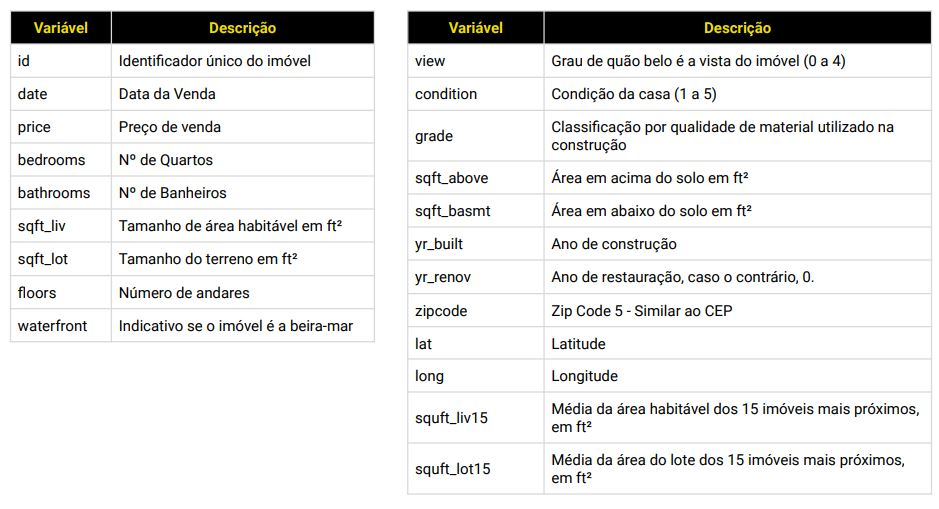

In [ ]:
dados['view'].unique() #esta dentro da classificação estabelecida

array([0, 3, 4, 2, 1])

In [ ]:
dados['condition'].unique() #esta dentro da classificação estabelecida

array([3, 5, 4, 1, 2])

# 5 - EXPLORAÇÃO DE DADOS - Modeling

5.1 - Quais as minhas métricas essenciais?

Resposta: Para a análise deste problema iremos considerar como métricas essenciais: preço (price), condition (condição), view (vista) e grade (qualidade).

A escolha destas métricas como essenciais será devido um perfil de investimento que tenho o melhor custo benefício, ou seja, um preço baixo com condições que valorizem os imóveis para uma revenda maior.

5.2 Visualização dos dados

Vamos entender a distribuição de preço por condição, vista e qualidade

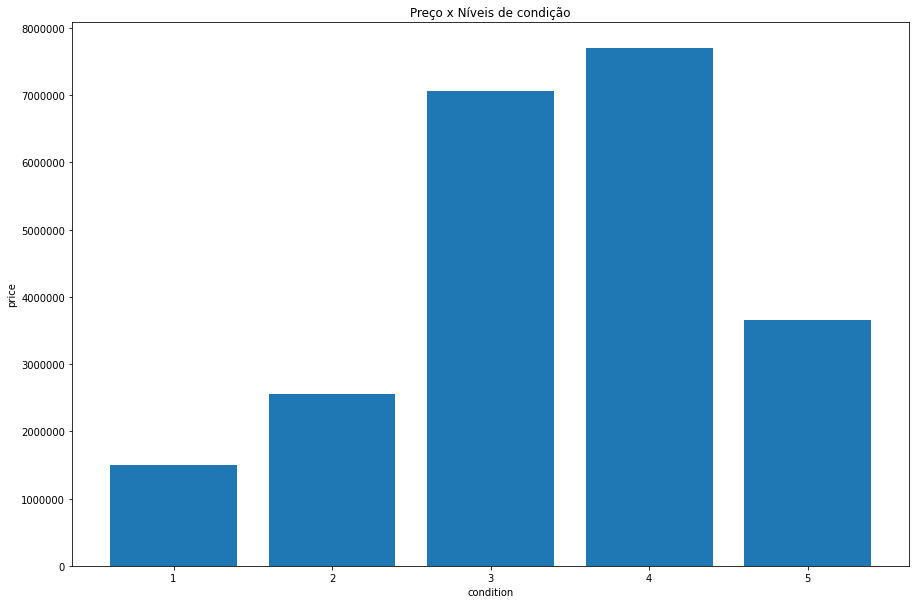

In [ ]:
plt.figure( figsize=(15,10))

plt.bar(dados.condition, dados.price)

plt.xlabel('condition')
plt.ylabel('price')
plt.title('Preço x Níveis de condição')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

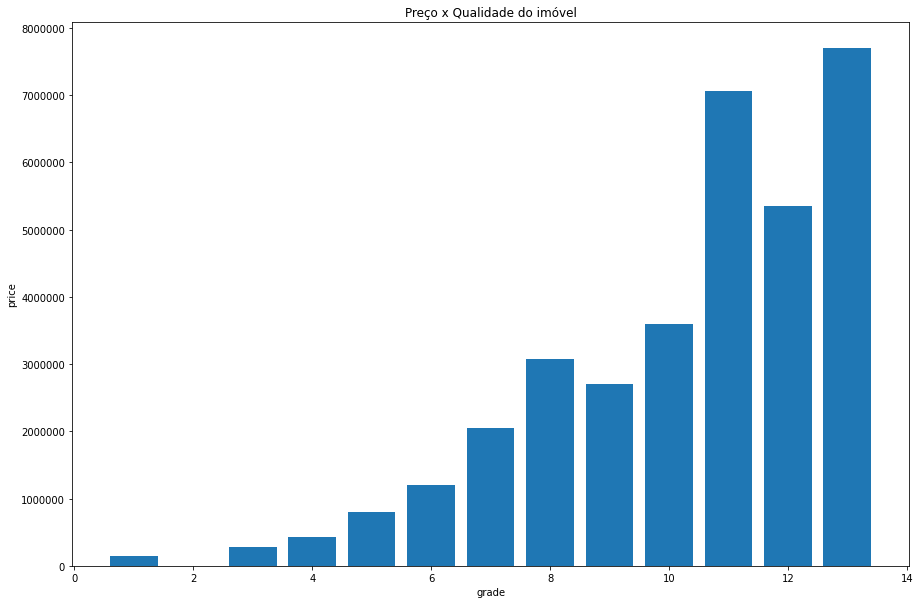

In [ ]:
plt.figure( figsize=(15,10))

plt.bar(dados.grade, dados.price)

plt.xlabel('grade')
plt.ylabel('price')
plt.title('Preço x Qualidade do imóvel')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

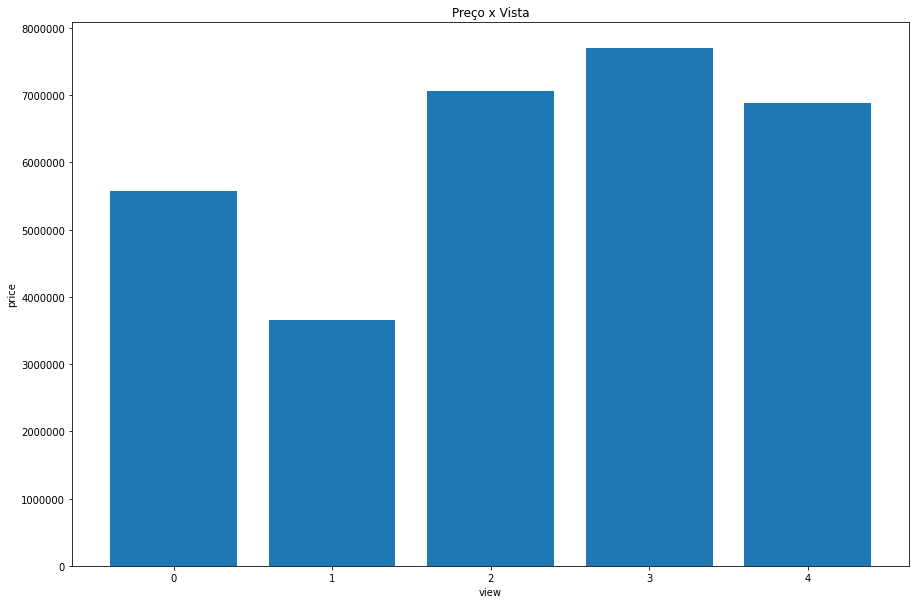

In [ ]:
plt.figure( figsize=(15,10))

plt.bar(dados.view, dados.price)

plt.xlabel('view')
plt.ylabel('price')
plt.title('Preço x Vista')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

Podemos observar que as métricas de vista, condição, qualidade consideradas nesta avaliação são atibutos que valorizam o imóvel e podem servir para agregar valor futuramente em uma revenda.


Vamos verificar a distribuição de preço dos imóveis

''

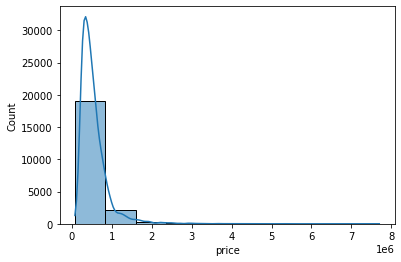

In [ ]:
#HISTOGRAMA
# seaborn
sns.histplot(x=dados['price'], kde=True, bins=10)

;

Entendemos que temos uma concentração de imóveis em valores mais baixos, porém existem outiliers

Vamos calcular o preço pela metragem para ficar melhor a visualização das informaçoes, além de podermos verificar os preço médio nas cidades posteriormente

In [ ]:
#CALCULAR O PREÇO POR FT^2
dados['Price_for_ft^2'] = dados['price']/dados['sqft_lot']
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price_for_ft^2
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955-01-01,0,98178,47.5112,-122.257,1340,5650,39.274336
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951-01-01,1991,98125,47.7210,-122.319,1690,7639,74.288870
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933-01-01,0,98028,47.7379,-122.233,2720,8062,18.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965-01-01,0,98136,47.5208,-122.393,1360,5000,120.800000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987-01-01,0,98074,47.6168,-122.045,1800,7503,63.118812


In [ ]:
#INSTALAR UMA BIBLIOTECA COM OS ZIPCODES DO U.S.A
!pip install uszipcode

from uszipcode import SearchEngine
engine = SearchEngine()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 6.9 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
#REALIZAR UMA PROCURA DE ZIPCODES E ASSOCIAR AO QUE SE TEM NA TABELA

#Acessar a documentação da biblioteca nova

help(SearchEngine)
#by_zipcode = Search zipcode by exact 5 digits zipcode. No zero padding is needed.

Help on class SearchEngine in module uszipcode.search:

class SearchEngine(builtins.object)
 |  SearchEngine(simple_or_comprehensive: uszipcode.search.SearchEngine.SimpleOrComprehensiveArgEnum = <SimpleOrComprehensiveArgEnum.simple: 1>, db_file_path: Union[str, NoneType] = None, download_url: Union[str, NoneType] = None, engine: sqlalchemy.engine.base.Engine = None)
 |  
 |  Zipcode Search Engine.
 |  
 |  :type simple_or_comprehensive: SearchEngine.SimpleOrComprehensiveArgEnum
 |  :param simple_or_comprehensive: default SearchEngine.SimpleOrComprehensiveArgEnum,
 |      use the simple zipcode db. Rich Demographics, Real Estate, Employment,
 |      Education info are not available. if
 |      SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive,
 |      use the rich info database.
 |  
 |  :type db_file_path: str
 |  :param db_file_path: where you want to download the sqlite database to. This
 |      property allows you to customize where you want to store the data file
 |      loca

In [ ]:
cidades = []
for index, row in dados.iterrows(): #iterrows serve para iterar cada linha da tabela
  zipcode= engine.by_zipcode(dados['zipcode'][index])
  cidades.append(zipcode.major_city)
dados['city'] = cidades
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price_for_ft^2,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955-01-01,0,98178,47.5112,-122.257,1340,5650,39.274336,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951-01-01,1991,98125,47.7210,-122.319,1690,7639,74.288870,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933-01-01,0,98028,47.7379,-122.233,2720,8062,18.000000,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965-01-01,0,98136,47.5208,-122.393,1360,5000,120.800000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987-01-01,0,98074,47.6168,-122.045,1800,7503,63.118812,Sammamish


In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price_for_ft^2,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955-01-01,0,98178,47.5112,-122.257,1340,5650,39.274336,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951-01-01,1991,98125,47.7210,-122.319,1690,7639,74.288870,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933-01-01,0,98028,47.7379,-122.233,2720,8062,18.000000,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965-01-01,0,98136,47.5208,-122.393,1360,5000,120.800000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987-01-01,0,98074,47.6168,-122.045,1800,7503,63.118812,Sammamish


In [ ]:
#MEDIA DE PREÇO POR FT^2 POR CIDADE
mediavalores = dados.groupby(['city'])['Price_for_ft^2'].agg('mean').reset_index()
mediavalores.sort_values('Price_for_ft^2')


,city,Price_for_ft^2
22,Vashon,15.078357
7,Fall City,16.939563
4,Carnation,17.774900
2,Black Diamond,21.086372
6,Enumclaw,21.900871
16,North Bend,28.787504
8,Federal Way,32.357975
23,Woodinville,33.199389
0,Auburn,33.826254
11,Kent,36.174340


In [ ]:
#IDENTIFICANDO O MENOR E MAIOR VALOR DE MÉDIA POR FT^2 COMO FILTRO
menor = min(dados.groupby(['city'])['Price_for_ft^2'].agg('mean'))
print(f' O menor valor de preço por ft^2 é de $ {menor:.2f}')
maior = max(dados.groupby(['city'])['Price_for_ft^2'].agg('mean'))
print(f' O maior valor de preço por ft^2 é de $ {maior:.2f}')

 O menor valor de preço por ft^2 é de $ 15.08
 O maior valor de preço por ft^2 é de $ 130.30


Vamos procurar por imóveis que tenham ótimas características por um preço baixo.

In [ ]:
#SEPARANDO IMÓVEIS COM VISTA >= 4 CONDIÇÃO >=4 E PREÇO <= $20 
dados.loc[(dados['view']>=4) & (dados['condition'] >= 4) & (dados['Price_for_ft^2'] <= 20)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price_for_ft^2,city
1949,1922039062,2015-04-20,480000.0,2,1.50,1008,26487,1.0,1,4,...,0,1943-01-01,2002,98070,47.3853,-122.479,1132,24079,18.122098,Vashon
13155,2521059042,2014-11-07,456000.0,5,2.75,2720,193406,1.0,0,4,...,1020,1968-01-01,0,98092,47.2838,-122.121,2820,248292,2.357735,Auburn
13322,1724069043,2014-06-18,739888.0,3,2.50,2420,43177,2.0,0,4,...,730,1989-01-01,0,98075,47.5690,-122.058,3740,8717,17.136160,Sammamish
13525,2013802060,2014-09-27,500000.0,2,1.00,1760,27332,1.0,1,4,...,460,1951-01-01,0,98198,47.3799,-122.325,2590,16630,18.293575,Seattle
18037,7003200120,2014-06-27,528000.0,2,0.75,840,40642,1.0,1,4,...,0,1937-01-01,0,98070,47.4040,-122.447,1850,64069,12.991487,Vashon


In [ ]:
dados['grade'].loc[(dados['view']>=4) & (dados['condition'] >= 4) & (dados['Price_for_ft^2'] <= 20)].reset_index()

,index,grade
0,1949,6
1,13155,7
2,13322,8
3,13525,7
4,18037,6


5.3 Baseado nos dados, qual decisão devo tomar?

Os imóveis sugeridos a serem comprados na seguinte ordem de prioridade:

1 - Index: 13155 - ID - 2521059042 - Possui o maior número de quartos, com qualidade alta e menor preço.

2 - Index: 13322 - ID - 1724069043 - Imóvel de maior qualidade dentre as opções.

3 - Index: 13525 - ID -	2013802060 - Imóvel com ótimas avaliações e maior qualidade que os ímoveis 7003200120 e 1922039062.

4 - Index: 18037 - ID - 7003200120 - Possui a mesma qualidade e número de quartos que o imóvel de ID 1922039062, porém em um preço mais baixo.

5 - Index: 1949 - ID - 1922039062 - Imóvel de boa avalição de qualidiade, preço, condição e vista.



Os imóveis apesar de não estarem em regiões mais famosas como Seattle possuem atributos para valorização ao longo do tempo, o que converge ao mercado de imóveis que possui um perfil voltado ao longo prazo.


# REFERÊNCIAS

Revista Valor econômico. Acesso em 12/11/2022. Disponível em: https://valor.globo.com/patrocinado/investe-safra/noticia/2022/08/24/aumento-de-juros-atinge-mercado-imobiliario-nos-eua.ghtml